In [1]:
import os
import json
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from core.data_processor import DataLoader
from core.model import Model
from keras.utils.vis_utils import plot_model

In [2]:

# 绘图展示结果
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.grid()
    plt.show()
    #plt.savefig('results_2.png')


def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')
    
def plot_results_multiple_onlypre(predicted_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    #ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')

In [3]:

#读取所需参数
configs = json.load(open('640-80-5-layers.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

In [4]:

#创建RNN模型
model = Model()
mymodel = model.build_model(configs)

model_path = '/home/shh/Desktop/LSTM_Final/saved_models/(640_80_50epo_5layers)08022023-175124-e50.h5'
model.load_model(filepath = model_path)
#plot_model(mymodel, to_file='model.png',show_shapes=True)

[Model] Model Compiled
Time taken: 0:00:00.361191
[Model] Loading model from file /home/shh/Desktop/LSTM_Final/saved_models/(640_80_50epo_5layers)08022023-175124-e50.h5


In [5]:

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False
    #normalise=configs['data']['normalise']
)

In [18]:
data

In [15]:
x_test[5621]

array([[-0.22420412],
       [-0.21969393],
       [-0.21400005],
       [-0.20681638],
       [-0.21253064],
       [-0.20838779],
       [-0.20218372],
       [-0.20771432],
       [-0.20226535],
       [-0.19710207],
       [-0.20491841],
       [-0.16846943],
       [-0.20755106],
       [-0.18169391],
       [-0.17822453],
       [-0.20285717],
       [-0.18246943],
       [-0.19355106],
       [-0.17528576],
       [-0.19932657],
       [-0.17936739],
       [-0.1916531 ],
       [-0.19069391],
       [-0.20324492],
       [-0.19463268],
       [-0.20232657],
       [-0.1876123 ],
       [-0.19710207],
       [-0.19502044],
       [-0.18306127],
       [-0.1964286 ],
       [-0.18555105],
       [-0.19659188],
       [-0.17185718],
       [-0.1976327 ],
       [-0.18077555],
       [-0.17955106],
       [-0.18724492],
       [-0.19953066],
       [-0.18342862],
       [-0.19291842],
       [-0.20991841],
       [-0.18897963],
       [-0.21640819],
       [-0.21106127],
       [-0

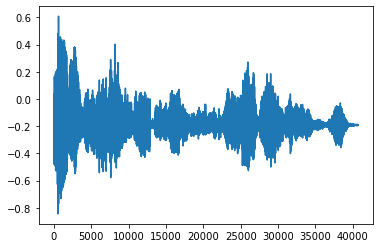

In [17]:
plt.plot(y_test)# with normal

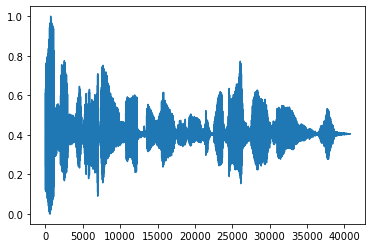

In [20]:
plt.plot(y_test)# without normal

In [12]:
x_test[5621]# no normal

array([[0.38789794],
       [0.39240813],
       [0.39810202],
       [0.40528569],
       [0.39957142],
       [0.40371427],
       [0.40991834],
       [0.40438774],
       [0.40983671],
       [0.41499999],
       [0.40718365],
       [0.44363263],
       [0.404551  ],
       [0.43040815],
       [0.43387753],
       [0.40924489],
       [0.42963263],
       [0.418551  ],
       [0.4368163 ],
       [0.41277549],
       [0.43273467],
       [0.42044896],
       [0.42140815],
       [0.40885714],
       [0.41746938],
       [0.4097755 ],
       [0.42448977],
       [0.41499999],
       [0.41708162],
       [0.42904079],
       [0.41567346],
       [0.42655101],
       [0.41551018],
       [0.44024488],
       [0.41446936],
       [0.43132651],
       [0.432551  ],
       [0.42485714],
       [0.4125714 ],
       [0.42867345],
       [0.41918364],
       [0.40218365],
       [0.42312244],
       [0.39569387],
       [0.40104079],
       [0.39802039],
       [0.39369386],
       [0.402

In [13]:
y_test[5621] #no normal

array([0.45275509])

# predict

In [6]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


[Model] Predicting Sequences Multiple...


# CSV with (0,1) scaler
### small_dataset_2s.csv

### have (0, 1) scalar when generate the csv, also have the normalization step in the model
### 2 normalization part --> good results below

# no (0, 1) 
# no normalization


## # 3 layers LSTM

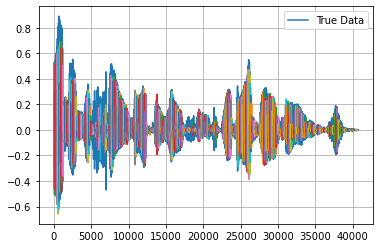

In [8]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [9]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [10]:
flat_predictions_multiseq = flatten(predictions_multiseq)

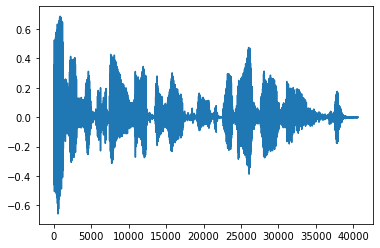

In [18]:
plt.plot(flat_predictions_multiseq)

In [12]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

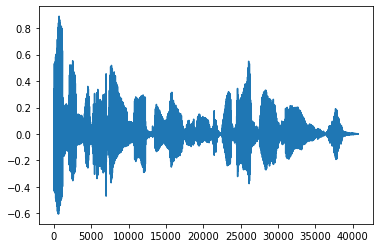

In [13]:
plt.plot(y_test_flatten)

In [14]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [15]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [17]:
import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/predicted.wav", flat_predictions_multiseq, sr)

## # 4 layers LSTM

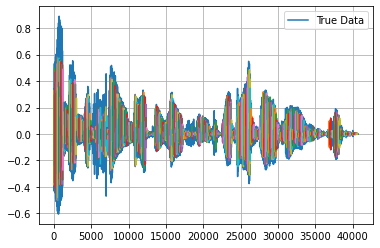

In [7]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [8]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [9]:
flat_predictions_multiseq = flatten(predictions_multiseq)

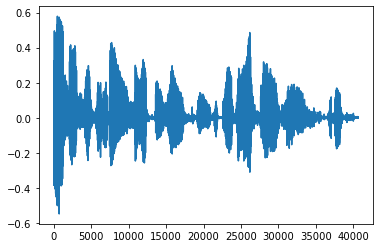

In [10]:
plt.plot(flat_predictions_multiseq)

In [11]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

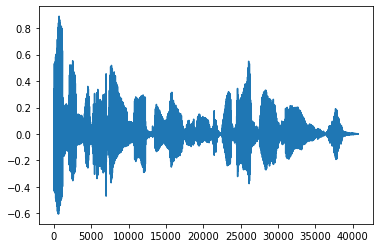

In [12]:
plt.plot(y_test_flatten)

In [13]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [14]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [15]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/4layers_predicted.wav", flat_predictions_multiseq, sr)

## # 2 layers LSTM

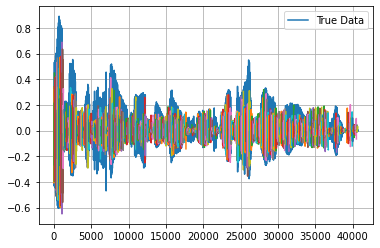

In [7]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [8]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [9]:
flat_predictions_multiseq = flatten(predictions_multiseq)

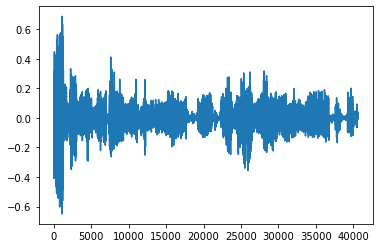

In [10]:
plt.plot(flat_predictions_multiseq)

In [11]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

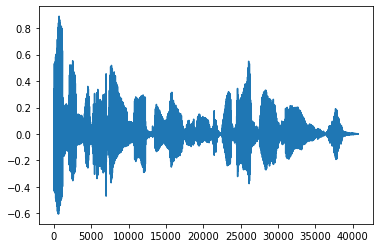

In [12]:
plt.plot(y_test_flatten)

In [13]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [14]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [15]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/2layers_predicted.wav", flat_predictions_multiseq, sr)

## # 5 layers LSTM

# no scalar

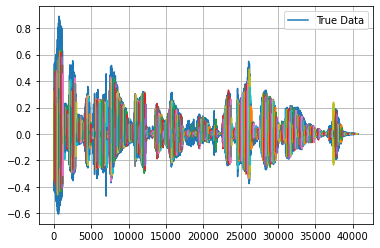

In [7]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [8]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

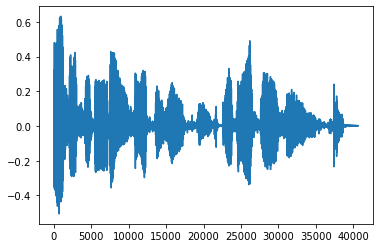

In [9]:
flat_predictions_multiseq = flatten(predictions_multiseq)
plt.plot(flat_predictions_multiseq)

In [10]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

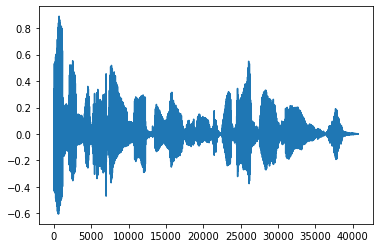

In [11]:
plt.plot(y_test_flatten)

In [12]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [13]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [14]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/5layers_predicted_no_scalar.wav", flat_predictions_multiseq, sr)

# no scalar

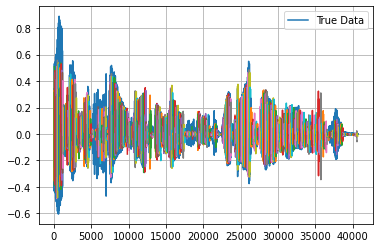

In [9]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [10]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [11]:
flat_predictions_multiseq = flatten(predictions_multiseq)

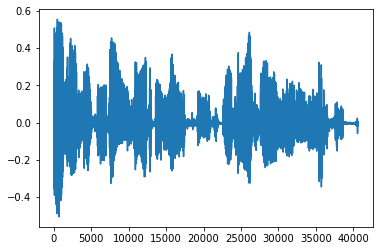

In [12]:
plt.plot(flat_predictions_multiseq)

In [13]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

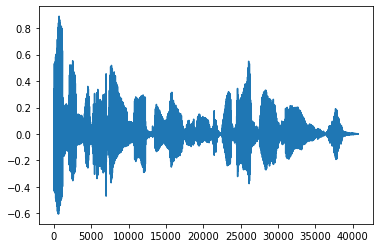

In [14]:
plt.plot(y_test_flatten)

In [15]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [16]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [17]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/6layers_predicted.wav", flat_predictions_multiseq, sr)

# with scalar

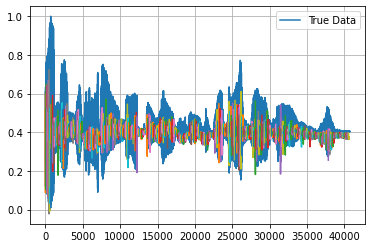

In [7]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [8]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [9]:
flat_predictions_multiseq = flatten(predictions_multiseq)

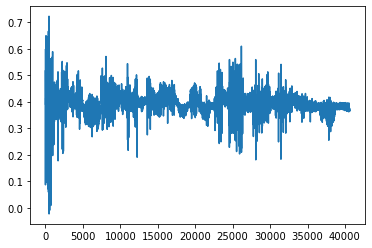

In [10]:
plt.plot(flat_predictions_multiseq)

In [11]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

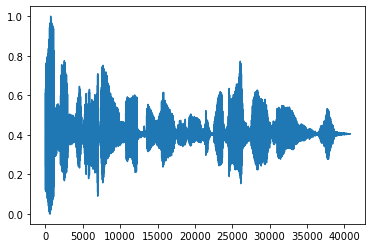

In [12]:
plt.plot(y_test_flatten)

In [13]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [14]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [15]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/6layers_predicted_with_scalar.wav", flat_predictions_multiseq, sr)

## # 6 layers LSTM

# with (0, 1) 
# no normalization

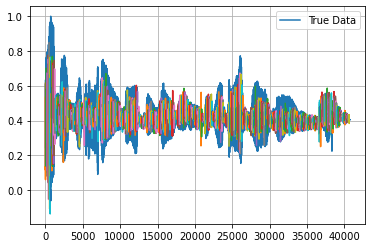

In [23]:
# (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [24]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [25]:
flat_predictions_multiseq = flatten(predictions_multiseq)

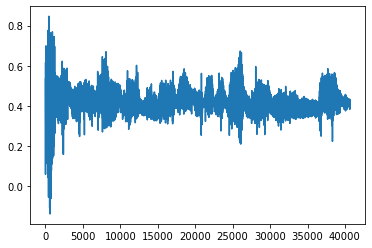

In [26]:
plt.plot(flat_predictions_multiseq)

In [27]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

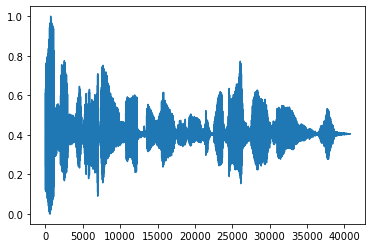

In [28]:
plt.plot(y_test_flatten)

In [29]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [30]:
# real
ipd.Audio(y_test_flatten, rate=16000)

## # 2 layers LSTM

# with (0, 1)
# with normalization

In [9]:
len(predictions_multiseq[1])

80

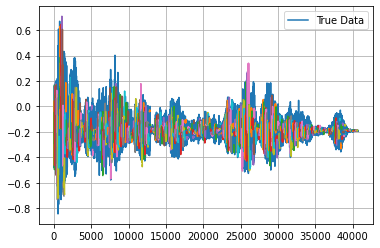

In [10]:
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [1]:
plot_results_multiple_onlypre(predictions_multiseq, prediction_len=80)

NameError: name 'plot_results_multiple_onlypre' is not defined

In [12]:
len(predictions_multiseq[:])

508

In [13]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [14]:
flat_predictions_multiseq = flatten(predictions_multiseq)

In [15]:
len(flat_predictions_multiseq)

40640

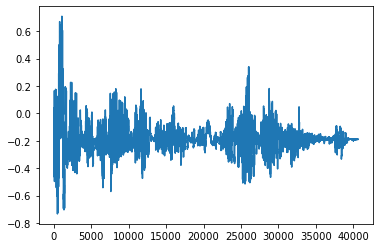

In [16]:
plt.plot(flat_predictions_multiseq)

In [17]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

In [18]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [19]:
# real
ipd.Audio(y_test_flatten, rate=16000)

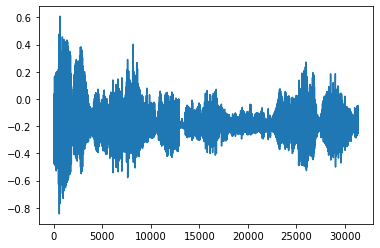

In [46]:
plt.plot(y_test_flatten)

In [20]:
# add 0.2 to the audio
flat_predictions_multiseq_shift = [x+0.2 for x in flat_predictions_multiseq]
y_test_flatten_shift = [x+0.2 for x in y_test_flatten]

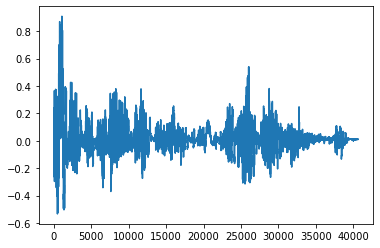

In [21]:
plt.plot(flat_predictions_multiseq_shift)

In [24]:
ipd.Audio(flat_predictions_multiseq_shift, rate=16000)

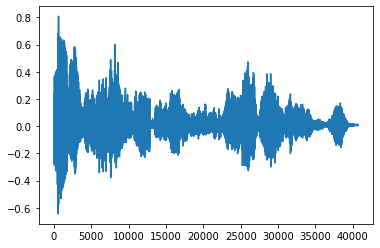

In [23]:
plt.plot(y_test_flatten_shift)

In [25]:
ipd.Audio(y_test_flatten_shift, rate=16000)

In [27]:
import soundfile as sf

In [28]:
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten_shift, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/predicted.wav", flat_predictions_multiseq_shift, sr)

# CSV have NO (0,1) scaler
### no_scaler.csv

### no (0, 1) scalar, only have 1 step of normalization in the model
### directly generate the csv, then send into the model --> bad results below


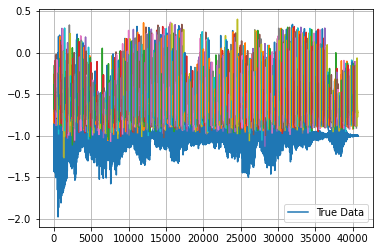

In [9]:
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)